# **THE SPARKS FOUNDATION-GRIP**
*Data Science and Business Analytics Internship*

**Name: SOHINI CHATTERJEE**

# **TASK 2: PREDICTION USING UNSUPERVISED ML**
From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

# **Importing all libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

# **Load the iris dataset**

In [3]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# **First 10 rows are displayed**

In [4]:
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


# **Finding the optimum number of Clusters for K-Means**

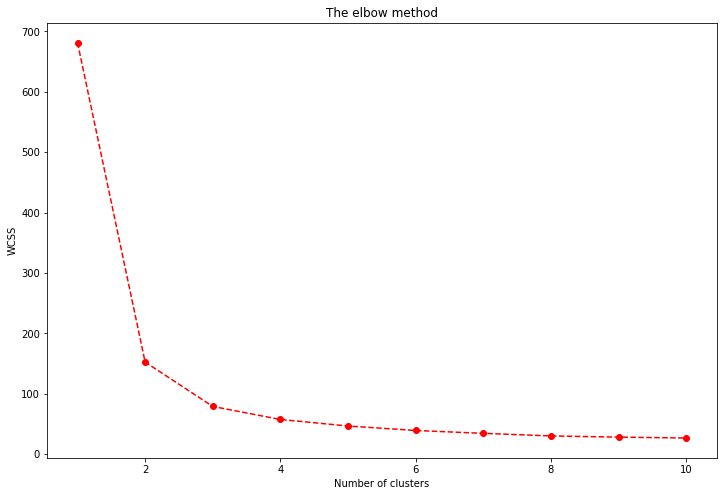

In [5]:
plt.figure(figsize=(12,8))
x=iris_df.iloc[:,[0,1,2,3]].values
from sklearn.cluster import KMeans
wcss=[]  #within cluster sum of squares
#this loop will fit the k-means algorithm to our data and 
#second we will compute the within cluster sum of squares and appended to our wcss list.
for i in range(1,11):
    kmeans=KMeans(n_clusters = i, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0).fit(x)
    wcss.append(kmeans.inertia_)
# i above is between 1-10 numbers. init parameter is the random initialization method .
#we select kmeans++ method. max_iter parameter the maximum number of iterations there can be to 
#find the final clusters when the K-means algorithm is running. we enter the default value of 300 the 
#next parameter is n_init which is the number of times the K_means algorithm will be run with 
#different initial centroid.
#kmeans inertia_ attribute is Sum of squared distances of samples to their closest cluster center.
plt.plot(range(1, 11), wcss, 'bo--',color='r')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  
plt.show()

## **The optimum number of clusters is obtained by the elbow method.**

After 3 the drop is minimal and hence we chose 3 to be the optimal value for K.

# **Here we Apply k-means Clustering Algorithm**

In [6]:
kmeans=KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans=kmeans.fit_predict(x)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


# **Data visualization**
visualising the clusters

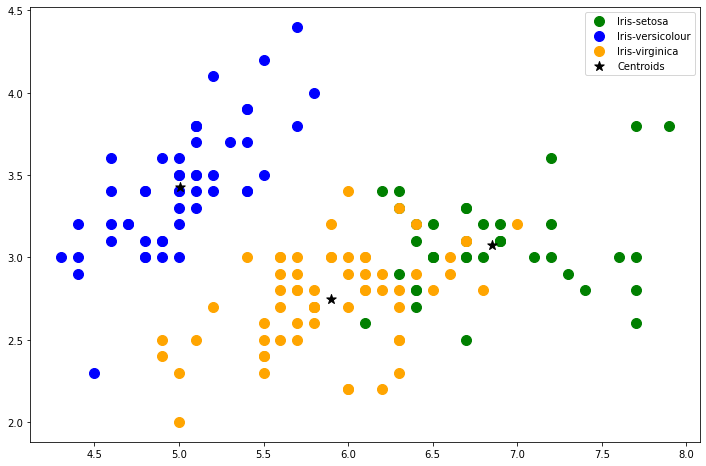

In [7]:
plt.figure(figsize=(12,8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'orange', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black',marker='*', label = 'Centroids')

plt.legend()
plt.show()

# **THANK YOU!!**